# Matplotlib Plotting Basic
Make sure that the necessary pacakges are installed:

In [ ]:
import sys
!{sys.executable} -m pip install matplotlib --user
!{sys.executable} -m pip install mplhep --user
!{sys.executable} -m pip install uproot --user
!{sys.executable} -m pip install scipy --user

## Importing the necessasry packages 
We will need matplotlib, uproot, numpy , awkward array, mplhep and scipy

In [5]:
import matplotlib
import uproot
import numpy as np
import awkward as ak
import mplhep as hep
from scipy.optimize import curve_fit

## Uproot: reading tree in root files as a uproot TTree object 
Uproot converts the root TTree file into its own TTree object 

In [6]:
tree=uproot.open("Zmumu.root")["physics"]
print(tree)

<TTree '' (15 branches) at 0x000106645f60>


## Uproot: converting the TTree object into a awkward array 
The uproot TTree object can be converted into python data sciecne object such as an awkward array, a numpy array or standard python dictionary objects

In [7]:
branches=tree.arrays()
print(branches)
print(type(branches))

[{lep1_pt: 59.9, lep1_eta: -2.18, lep1_phi: -1.42, lep1_E: 268, ...}, ...]
<class 'awkward.highlevel.Array'>


## Converting the awkward array to a more familiar python list object 

In [9]:
branches_dictionary=branches.tolist()
print(type(branches_dictionary))
print(type(branches_dictionary[0]))

<class 'list'>
<class 'dict'>


## Printing Total number of events

In [11]:
print("Total event #: ", len(branches_dictionary))

Total event #:  2500000


## Printing lep1_pt for the event #1

In [10]:
print("Event 1 , lep_pt: ", branches_dictionary[1]["lep1_pt"])

Event 1 , lep_pt:  33.927207946777344


## Listing value in event 123

In [12]:
print("Event # 123: ")
print("-------")
for branch, value in branches_dictionary[123].items():
    print("%s : %s"%(branch, value))


Event # 123: 
-------
lep1_pt : 36.613399505615234
lep1_eta : 1.7273433208465576
lep1_phi : 2.458820104598999
lep1_E : 106.24195861816406
lep1_m : 0.10270115733146667
lep2_pt : 24.32341766357422
lep2_eta : 0.9998672008514404
lep2_phi : -0.6162007451057434
lep2_E : 37.52934646606445
lep2_m : 0.10544638335704803
Z_pt : 12.449456214904785
Z_eta : 3.028292417526245
Z_phi : 2.3284811973571777
Z_E : 143.77130126953125
Z_m : 63.64608383178711


## Making 1d histogram with Matplotlib


In [13]:
from matplotlib import pyplot as plt

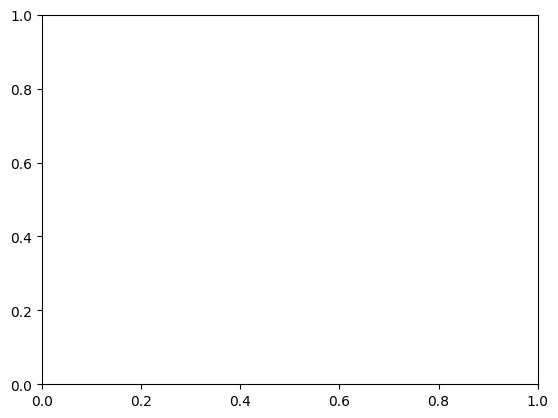

In [16]:
fig, ax = plt.subplots()

## Get lep1_pt

In [19]:
lep1_pt=branches["lep1_pt"]
print(type(lep1_pt))

<class 'awkward.highlevel.Array'>


## Making pyplot object from the lepton 1 pt branch

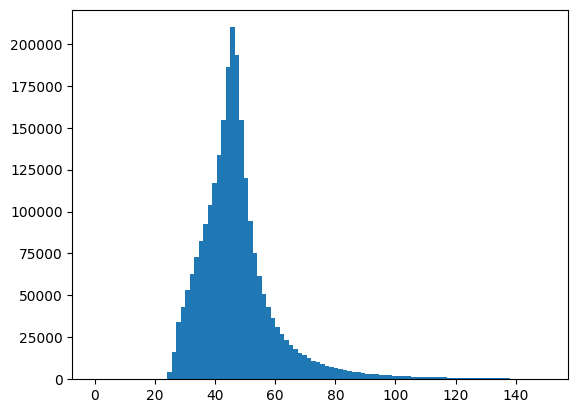

In [20]:
fill, bins, edges=plt.hist(lep1_pt, bins=100, range=(0,150))

## hist1d: Beautifying: Adding axis label and legend to plot 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


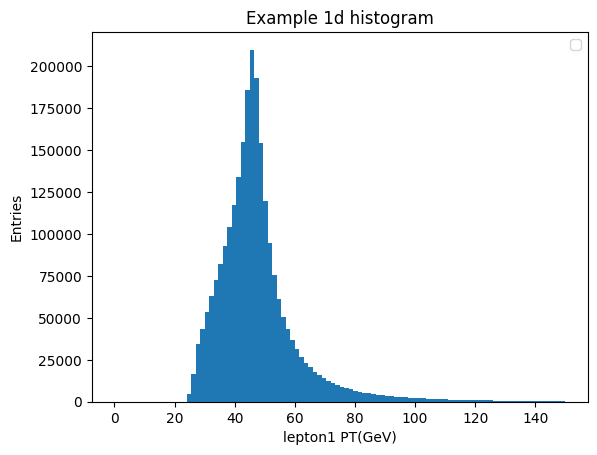

In [23]:
fig, ax = plt.subplots()
fill, bins, edges=plt.hist(lep1_pt, bins=100, range=(0,150))
ax.set_ylabel("Entries")
ax.set_xlabel("lepton1 PT(GeV)")
ax.set_title("Example 1d histogram")
plt.legend()
plt.show()

## hist1d: Further beutifying: Make log, coloring etc 

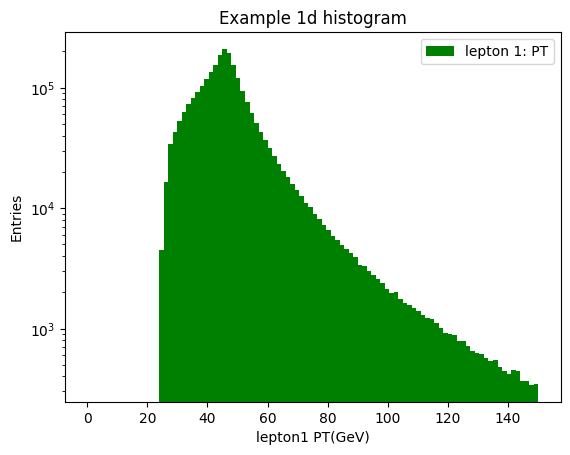

In [25]:
fig, ax = plt.subplots()
fill, bins, edges=plt.hist(lep1_pt, bins=100, range=(0,150), label="lepton 1: PT", color="g", log=True)
ax.set_ylabel("Entries")
ax.set_xlabel("lepton1 PT(GeV)")
ax.set_title("Example 1d histogram")
plt.legend()
plt.show()

## hist1d: Creating a mask to only look at events with lepton 1 pt < 40 GeV

In [26]:
mask=branches['lep1_pt']<40
print("mask: ", mask)
lep1_pt_filtered=lep1_pt[mask]

mask:  [False, True, True, True, False, False, ..., False, False, True, True, True]


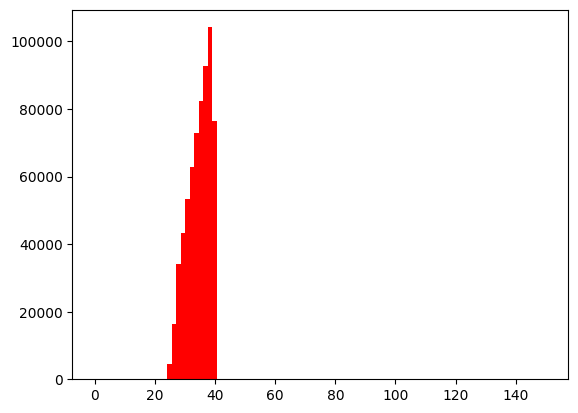

In [27]:
fill, bins, edges=plt.hist(lep1_pt_filtered, bins=100, range=(0,150), label="lepton 1: PT, PT<40GeV", color="r")

## hist1d masked: Beautifying 

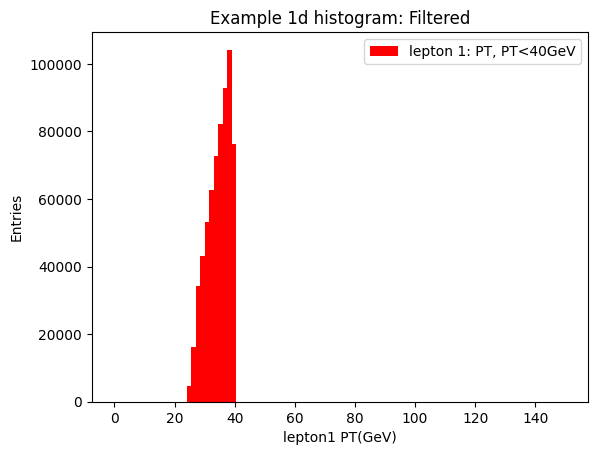

In [28]:
fig, ax = plt.subplots()
fill, bins, edges=plt.hist(lep1_pt_filtered, bins=100, range=(0,150), label="lepton 1: PT, PT<40GeV", color="r")

ax.set_ylabel("Entries")
ax.set_xlabel("lepton1 PT(GeV)")
ax.set_title("Example 1d histogram: Filtered")
plt.legend()
plt.show()

## hist1d: Comparing two histograms 

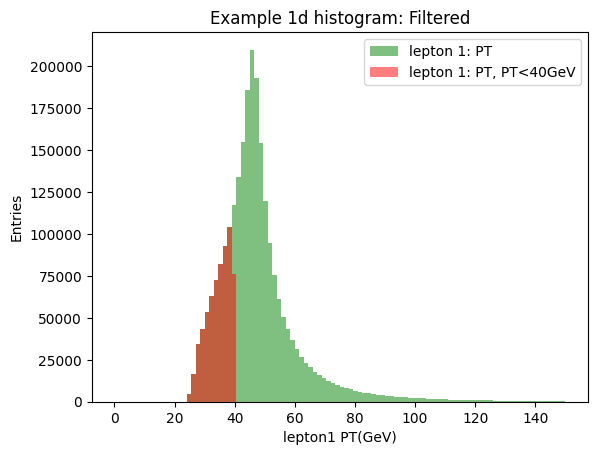

In [29]:
fig, ax = plt.subplots()

#Add the histograms here 
fill, bins, edges=plt.hist(lep1_pt, bins=100, range=(0,150), label="lepton 1: PT", color="g", alpha=0.5)
fill, bins, edges=plt.hist(lep1_pt_filtered, bins=100, range=(0,150), label="lepton 1: PT, PT<40GeV", color="r", alpha=0.5)


ax.set_ylabel("Entries")
ax.set_xlabel("lepton1 PT(GeV)")
ax.set_title("Example 1d histogram: Filtered")
plt.legend()
plt.show()


## hist1d: Showing histogram statistics from the python array object directly 

In [30]:
rms = np.sqrt(np.mean(np.square(lep1_pt)))
mean = np.mean(lep1_pt)
integral = len(lep1_pt)
max_bin=np.argmax(lep1_pt)

print("mean: ", mean)
print("rms:", rms)
print("integral: ", integral)
print("max bin entry #: ", max_bin)

mean:  48.2660032
rms: 58.77952819136949
integral:  2500000
max bin entry #:  2481654


## hist2d: Drawing 2d histogram object 

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 4., 1., 0.],
        [0., 0., 0., ..., 3., 1., 0.]]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ,  16.5,  18. ,  19.5,  21. ,  22.5,  24. ,  25.5,
         27. ,  28.5,  30. ,  31.5,  33. ,  34.5,  36. ,  37.5,  39. ,
         40.5,  42. ,  43.5,  45. ,  46.5,  48. ,  49.5,  51. ,  52.5,
         54. ,  55.5,  57. ,  58.5,  60. ,  61.5,  63. ,  64.5,  66. ,
         67.5,  69. ,  70.5,  72. ,  73.5,  75. ,  76.5,  78. ,  79.5,
         81. ,  82.5,  84. ,  85.5,  87. ,  88.5,  90. ,  91.5,  93. ,
         94.5,  96. ,  97.5,  99. , 100.5, 102. , 103.5, 105. , 106.5,
        108. , 109.5, 111. , 112.5, 114. , 115.5, 117. , 118.5, 120. ,
        121.5, 123. , 124.5, 126. , 127.5, 129. , 130.5, 132. , 133.5,
        135. , 136.5, 138. , 139.5, 141. 

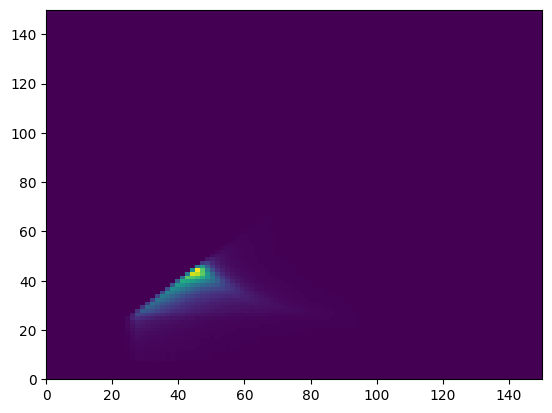

In [31]:
lep2_pt=branches['lep2_pt']

plt.hist2d(np.array(lep1_pt), np.array(lep2_pt), bins=[100, 100], range=[[0,150], [0, 150]])




## hist2d: Beautifying 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


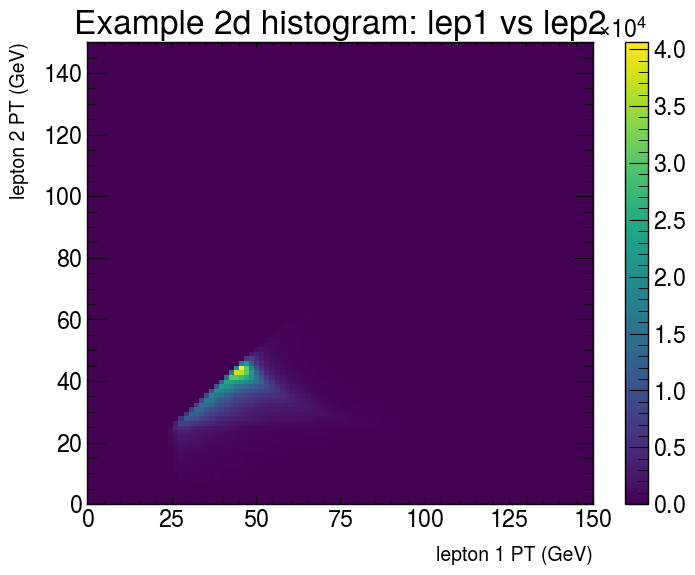

In [171]:
fig, ax= plt.subplots()
plt.hist2d(np.array(lep1_pt), np.array(lep2_pt), bins=[100, 100], range=[[0,150], [0, 150]])
plt.colorbar()
ax.set_ylabel("lepton 2 PT (GeV)")
ax.set_xlabel("lepton 1 PT (GeV)")
ax.set_title("Example 2d histogram: lep1 vs lep2")
plt.legend()




## Graph: Making a Graph 

<Figure size 640x480 with 0 Axes>

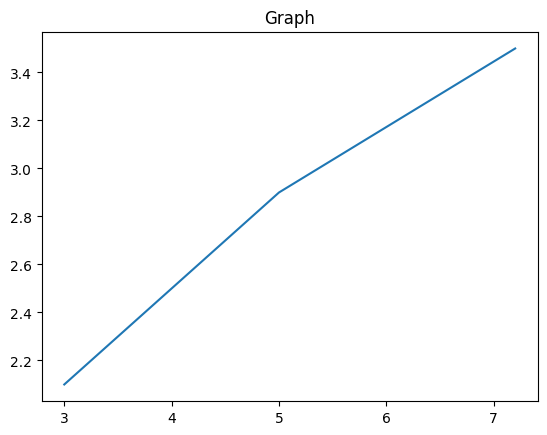

In [32]:
plt.clf()
fig, ax= plt.subplots()
ax.set_title("Graph")
plt.plot([3,5,7.2], [2.1,2.9,3.5])


## hist fit : Fitting the Z mass peak 

In [33]:
from scipy.optimize import curve_fit

## Getting the Z mass branch

In [175]:
Z_mass=branches["Z_m"]

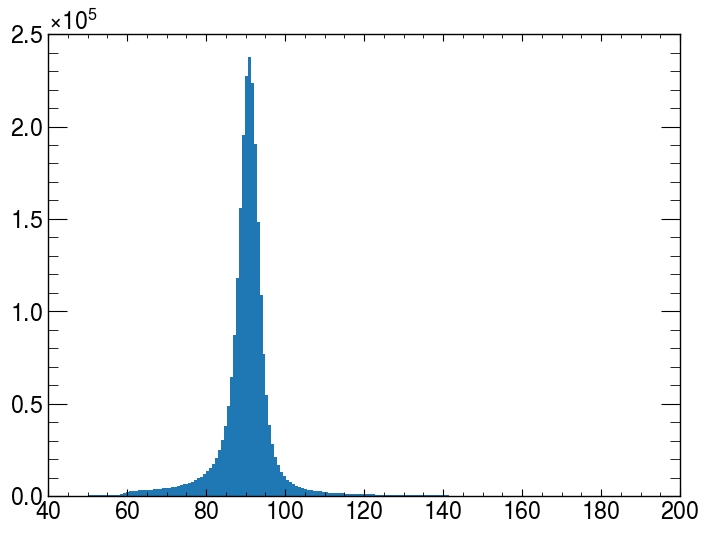

In [176]:
fig, ax = plt.subplots()
counts, edges, _= plt.hist(Z_mass, bins=200, range=(50,200), label="Z mass")

## hist fit: Preparing the fit in Gaussian Function 

In [34]:
from scipy.optimize import curve_fit

#create a gaussian function for fitting 
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

## hist fit: Define X, y, bins from the 1d histogram 

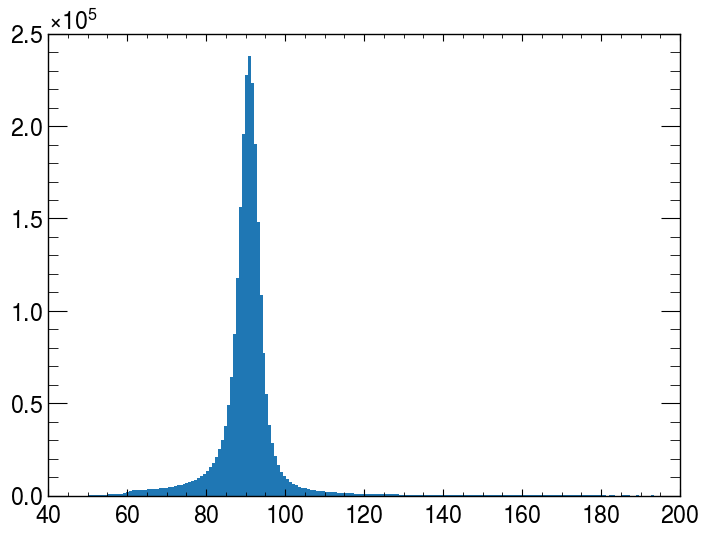

In [71]:
# Fit data xdata/ydata
counts, edges, _= plt.hist(Z_mass, bins=200, range=(50,200), label="Z mass")
bins=np.linspace(0,100, 200)
xdata=(edges[:-1]+edges[1:])/2
ydata=counts

## histfit: Fit the histogram

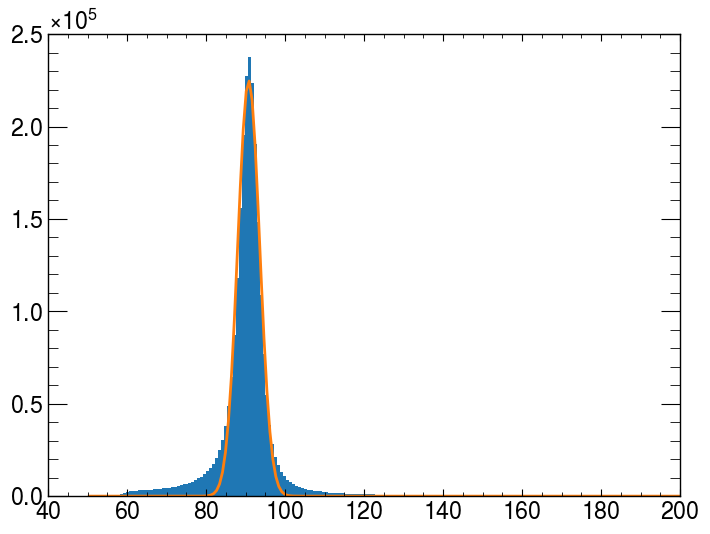

In [186]:
from scipy.optimize import curve_fit

#create a gaussian function for fitting 
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


# Get the fitted curve
optimizedParameters, pcov = curve_fit(gauss, xdata, ydata, p0=[2000000., 100., 1.]);
y_fit=gauss(xdata, *optimizedParameters)

#Drawing the fit curve over the original histogram
counts, edges, _= plt.hist(Z_mass, bins=200, range=(50,200), label="Z mass")
plt.plot(xdata, y_fit, label="fit");

## hist fit: Beautifying 

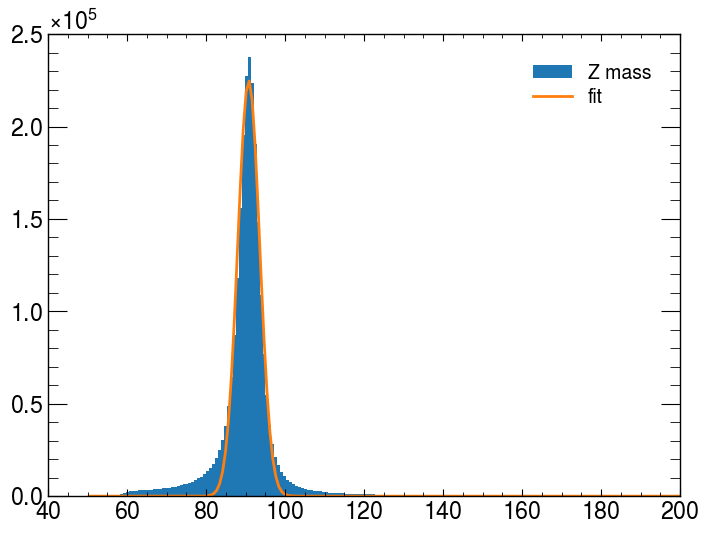

In [189]:
counts, edges, _= plt.hist(Z_mass, bins=200, range=(50,200), label="Z mass")
plt.plot(xdata, y_fit, label="fit");
ax.set_xlabel("pt(GeV)", fontsize=15)
ax.set_ylabel("Events ", fontsize=15)
ax.legend()
plt.legend()
plt.show()

## hist fit: Getting the fit parameters 

In [69]:
print('Fitted amp = ', optimizedParameters[0])
print('Fitted mean = ', optimizedParameters[1])
print('Fitted standard deviation = ', optimizedParameters[2])

Fitted amp =  224833.95003746863
Fitted mean =  90.75921756252049
Fitted standard deviation =  2.777861533290021


# EXTREME BEAUTIFYING (bonus material)
## A.k.a: How to make my matplotlib plots look like ROOT plots? 
## Example 1d histogram

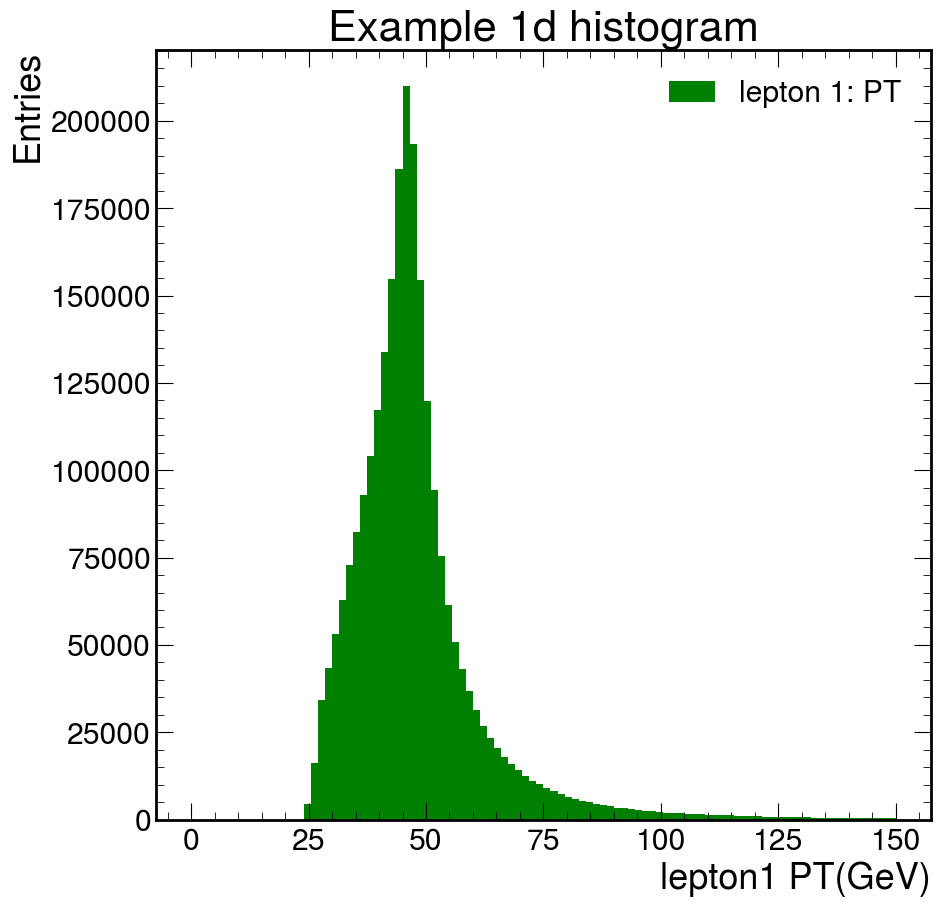

In [39]:
import mplhep as hep

fig, ax = plt.subplots()
fill, edges, _=plt.hist(lep1_pt, bins=100, range=(0,150), label="lepton 1: PT", color="g")

ax.set_ylabel("Entries")
ax.set_xlabel("lepton1 PT(GeV)")
ax.set_title("Example 1d histogram")
plt.legend()
plt.show()

## Using mplhep histplot and the built-in ATLAS style and label

/var/folders/50/rhj1rsj9317d9pfht5v6w4s80000gn/T/ipykernel_44684/3333250534.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 800x600 with 0 Axes>

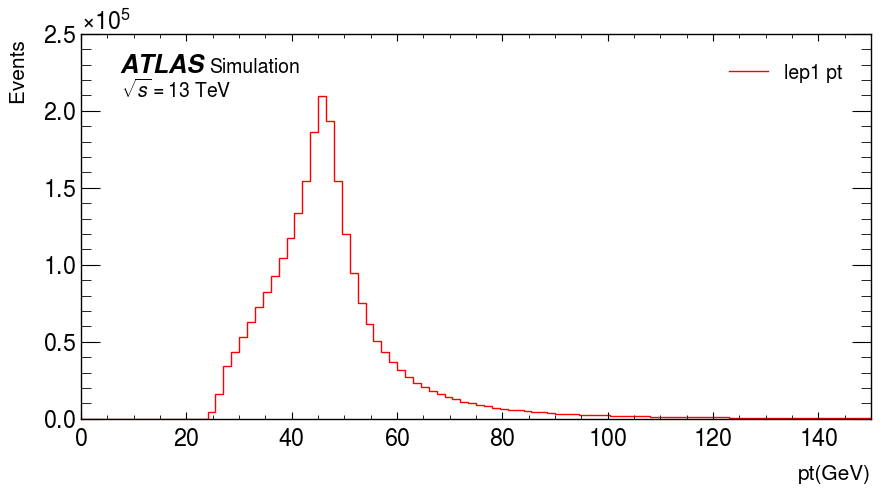

In [60]:
import mplhep as hep
#hep.style.use(hep.style.CMS)
hep.style.use(hep.style.ATLAS)

fill, edges, bins=plt.hist(lep1_pt, bins=100, range=(0,150), label="lepton 1: PT", color="g", log=True)
plt.clf()


fig, ax = plt.subplots(figsize=(10, 5))
hep.histplot(
    fill,
    bins=edges,
    histtype="step", #"fill"
    color="w",
    alpha=1,
    edgecolor="r",
    label="lep1 pt",
    ax=ax,
)


ax.set_xlabel("pt(GeV)", fontsize=15)
ax.set_ylabel("Events ", fontsize=15)
ax.set_xlim(0, 150)
ax.legend()
hep.atlas.label()

#hep.atlas.label("Preliminary", data=True, lumi=50, year=2017)

fig.show()

## Matplotlib: 2d histogram 

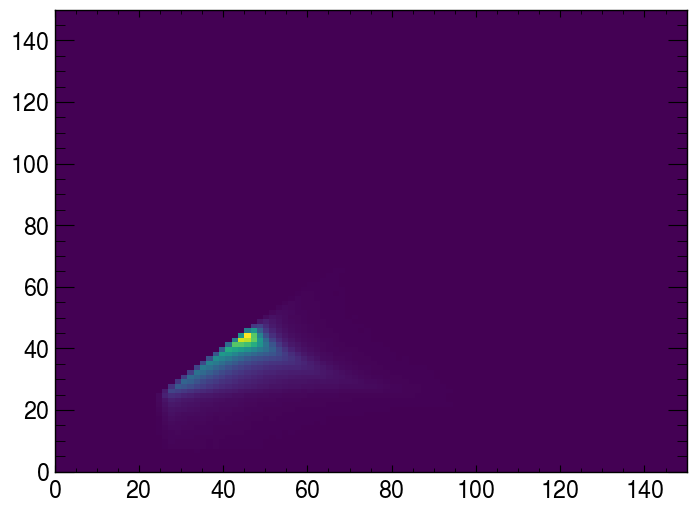

In [61]:
import numpy as np
fill, x_edges, y_edges, _=plt.hist2d(np.array(lep1_pt), np.array(lep2_pt), bins=[100, 100], range=[[0,150], [0, 150]])



## mplhep: 2d histogram (CMS format)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

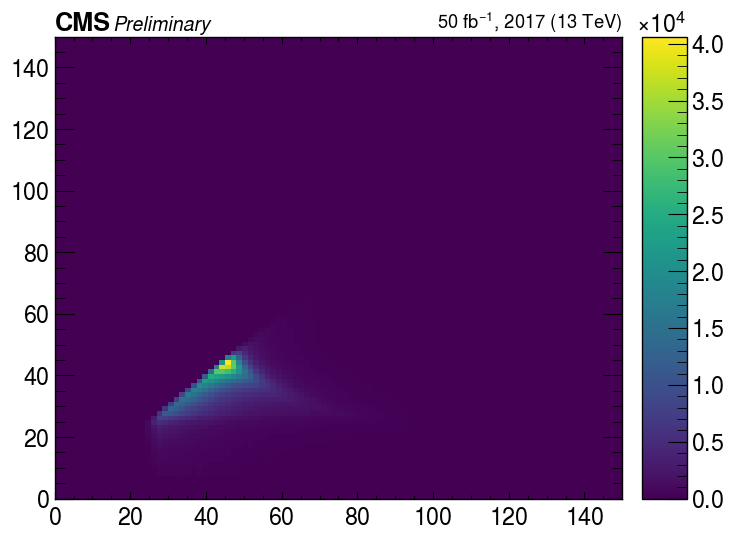

In [63]:
plt.clf()
hep.style.use(hep.style.ATLAS)
hep.hist2dplot(fill, x_edges, y_edges)
hep.cms.label("Preliminary", data=True, lumi=50, year=2017)


## Matplotlib: fitted histogram

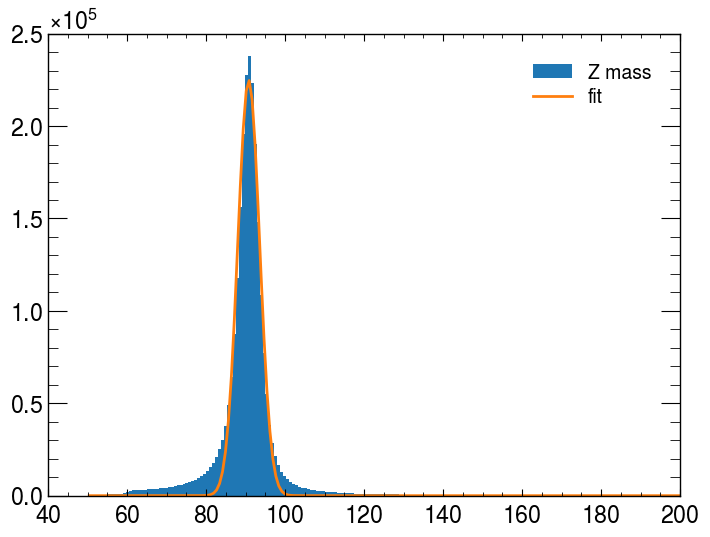

In [64]:
Z_mass=branches["Z_m"]


counts, edges, _= plt.hist(Z_mass, bins=200, range=(50,200), label="Z mass")
xdata=(edges[:-1]+edges[1:])/2
ydata=counts
#create a gaussian function for fitting 
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


# Get the fitted curve
optimizedParameters, pcov = curve_fit(gauss, xdata, ydata, p0=[2000000., 100., 1.]);
y_fit=gauss(xdata, *optimizedParameters)


plt.plot(xdata, y_fit, label="fit");
ax.set_xlabel("pt(GeV)", fontsize=15)
ax.set_ylabel("Events ", fontsize=15)

ax.legend()
plt.legend()
plt.show()

## mplhep: Fitted histogram (ATLAS format)

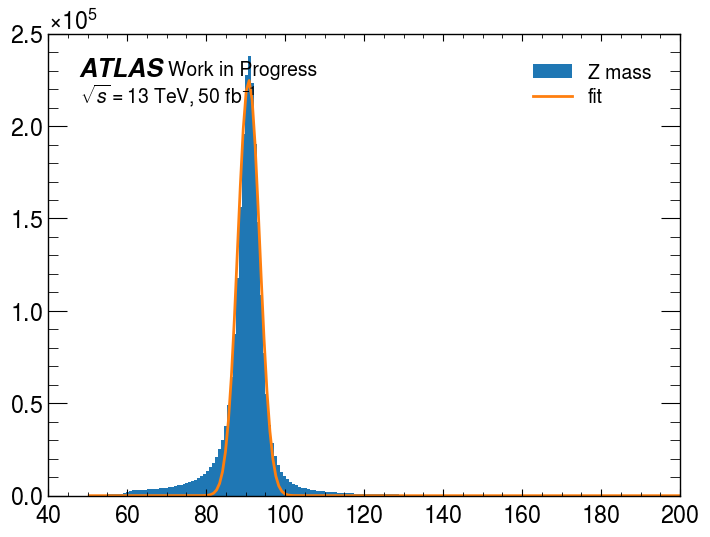

In [70]:
Z_mass=branches["Z_m"]


counts, edges, _= plt.hist(Z_mass, bins=200, range=(50,200), label="Z mass")
xdata=(edges[:-1]+edges[1:])/2
ydata=counts
#create a gaussian function for fitting 
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


# Get the fitted curve
optimizedParameters, pcov = curve_fit(gauss, xdata, ydata, p0=[2000000., 100., 1.]);
y_fit=gauss(xdata, *optimizedParameters)

hep.style.use(hep.style.ATLAS)

plt.plot(xdata, y_fit, label="fit");

ax.legend()
hep.atlas.label("Work in Progress", data=True, lumi=50, year=2017)

plt.legend()
plt.show()